In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

import cv2
import pandas as pd
import random
import ntpath

## Sklearn
from sklearn.utils import shuffle

In [24]:
datadir = '/kaggle/input/selfdriving-car-dataset/data-master/'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
dataset = pd.read_csv(os.path.join(datadir,'/kaggle/input/selfdriving-car-dataset/data-master/driving_log.csv'),names=columns)
# dataset.head()

In [25]:
center_path = [datadir + path[44:] for path in dataset["center"]]
right_path = [datadir + path[44:] for path in dataset["right"]]
left_path = [datadir + path[44:] for path in dataset["left"]]

In [26]:
center_path = pd.DataFrame(center_path, columns=["center"])
right_path = pd.DataFrame(right_path, columns=["right"])
left_path = pd.DataFrame(left_path, columns=["left"])

In [27]:
dataset = pd.concat([center_path, left_path, right_path, dataset[["steering", "throttle", "reverse", "speed"]]], axis = 1)
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078
1,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078
2,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000079
3,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078
4,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000079


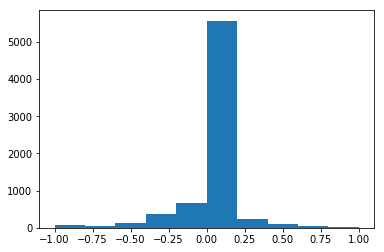

In [28]:
plt.hist(dataset["steering"])
plt.show()

In [29]:
count = 0
dataset["ignore_data"] = [False for i in range(len(dataset))]
for i in range(len(dataset)):
    if dataset["steering"][i] == 0:
        if count % 2 == 0:
            dataset["ignore_data"][i] = True
        count += 1
dataset.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,center,left,right,steering,throttle,reverse,speed,ignore_data
0,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078,True
1,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078,False
2,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000079,True
3,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078,False
4,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000079,True


In [30]:
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [31]:
dataset = dataset[dataset["ignore_data"] == False]

In [32]:
import cv2
# Takes image path as parameter
# Returns processed image
def image_processing(image):
    image = npimg.imread(image)
    # crop the image to ignore useless features like the sky
    image_cropped = image[65:,:,:] 
    gray = cv2.cvtColor(image_cropped, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    cannyImage = cv2.Canny(blur, 120, 300)
    img = cv2.resize(cannyImage, (100, 100))
    img = img / 255
    return img

,center,left,right,steering,throttle,reverse,speed,ignore_data
1,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078,False
3,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078,False
5,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078,False
7,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000078,False
9,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,/kaggle/input/selfdriving-car-dataset/data-mas...,0.0,0.0,0.0,0.000079,False


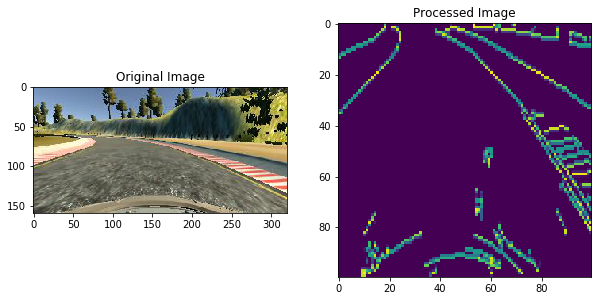

In [33]:
image = npimg.imread(dataset["center"][5])
processed_image = image_processing(dataset["center"][5])

f, axarr = plt.subplots(1,2, figsize=(10, 20))
axarr[0].imshow(image)
axarr[0].set_title("Original Image")
axarr[1].imshow(processed_image)
axarr[1].set_title("Processed Image")
dataset.head()

In [34]:
from sklearn.model_selection import train_test_split
images = dataset["center"]
steering = dataset["steering"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(images, steering, test_size = 0.2, random_state = 10)
print(X_train.shape)

(3688,)


(3688,) (922,)


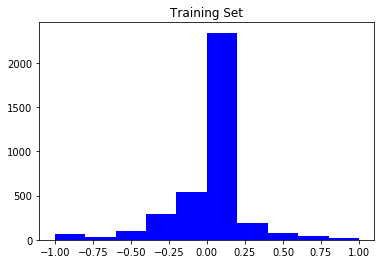

In [36]:
print(X_train.shape,X_test.shape)
plt.hist(y_train, color="blue")
plt.title("Training Set")
plt.show()

(3688,) (922,)


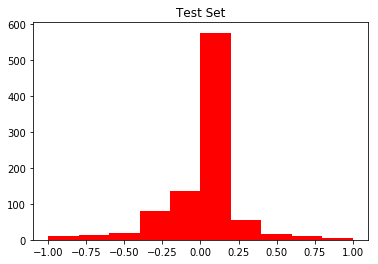

In [37]:
print(y_train.shape,y_test.shape)
plt.hist(y_test, color="red")
plt.title("Test Set")
plt.show()

In [38]:
X_train = np.array(list(map(image_processing, X_train)))
X_test = np.array(list(map(image_processing, X_test)))

In [39]:
for i in range(len(X_train)):
    X_train[i] = np.reshape(X_train[i], (1, 100, 100))
for i in range(len(X_test)):
    X_test[i] = np.reshape(X_test[i], (1, 100, 100))

In [40]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [41]:
def build_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(100,100,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='mse', optimizer="sgd", metrics=['accuracy'])
    return model

In [42]:
model = build_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 256)      

Train on 3688 samples, validate on 922 samples
Epoch 1/10
3688/3688 [==============================] - 861s 233ms/sample - loss: 0.4562 - accuracy: 0.1605 - val_loss: 0.3557 - val_accuracy: 0.0011
Epoch 2/10
3688/3688 [==============================] - 866s 235ms/sample - loss: 0.3102 - accuracy: 0.3373 - val_loss: 0.2343 - val_accuracy: 0.5748
Epoch 3/10
3688/3688 [==============================] - 871s 236ms/sample - loss: 0.2276 - accuracy: 0.4528 - val_loss: 0.1678 - val_accuracy: 0.5748
Epoch 4/10
3688/3688 [==============================] - 865s 234ms/sample - loss: 0.1729 - accuracy: 0.5426 - val_loss: 0.1318 - val_accuracy: 0.5748
Epoch 5/10
3688/3688 [==============================] - 855s 232ms/sample - loss: 0.1457 - accuracy: 0.5651 - val_loss: 0.1103 - val_accuracy: 0.5748
Epoch 6/10
3688/3688 [==============================] - 853s 231ms/sample - loss: 0.1251 - accuracy: 0.5738 - val_loss: 0.0970 - val_accuracy: 0.5748
Epoch 7/10
3688/3688 [==============================]

Text(0.5, 0, 'Epoch')

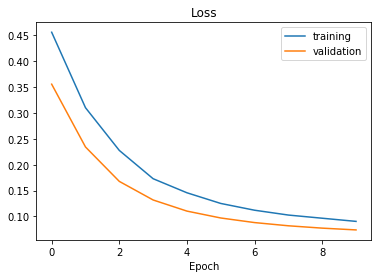

In [43]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,  validation_data=(X_test, y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

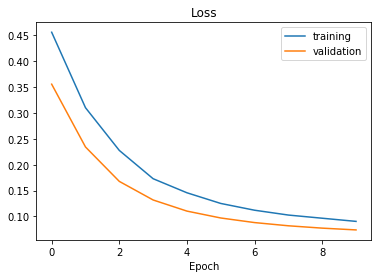

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

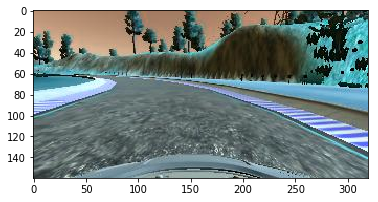

In [45]:
test = cv2.imread("../input/selfdriving-car-dataset/data-master/IMG/center_2018_10_17_16_36_30_865.jpg")
import matplotlib.pyplot as plt
plt.imshow(test)

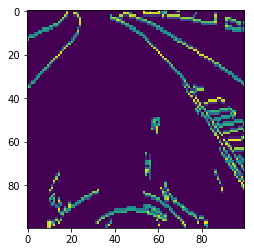

In [52]:
image_cropped = test[65:,:,:] 
gray = cv2.cvtColor(image_cropped, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
cannyImage = cv2.Canny(blur, 120, 300)
img = cv2.resize(cannyImage, (100, 100))
plt.imshow(img)

In [53]:
img = np.array(img)
img = np.reshape(img, (1, 100, 100))


In [54]:
img = np.expand_dims(img, -1)
model.predict(img)

array([[0.10423126]], dtype=float32)